In [2]:
import os
# use CPU
#os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
#os.environ["CUDA_VISIBLE_DEVICES"] = ""
os.environ["CUDA_VISIBLE_DEVICES"]="3"

import tensorflow as tf
model = tf.keras.models.load_model('model.h5')

In [6]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage import img_as_bool, io, color
import numpy as np

img_width,img_height = 256,256
#img = load_img('data/validation/thick/0001.png',False,target_size=(img_width,img_height))

test_dir = "data/test/"

test_imgs = os.listdir(test_dir)
predicciones = []
imagenes = []
for img in test_imgs:
    imgPath = test_dir + img
    if not os.path.isdir(imgPath) :
        imgBool = img_as_bool(color.rgb2gray(io.imread(imgPath)))
        imagenes.append(imgBool)
        
        x = img_to_array(imgBool)
        x = np.expand_dims(x, axis=0)
        clases = model.predict_classes(x)
        clase = None
        if 1 in clases:
            clase = "Fibra gruesa"
        elif 0 in clases:
            clase = "Fibra delgada"
        predicciones.append(clase)
        print(img, " es ", clase)


0020.png  es  Fibra gruesa
0001.png  es  Fibra delgada
0014.png  es  Fibra gruesa
0011.png  es  Fibra gruesa
0002.png  es  Fibra delgada
0004.png  es  Fibra delgada
0009.png  es  Fibra gruesa
0015.png  es  Fibra gruesa
0017.png  es  Fibra gruesa
0006.png  es  Fibra delgada
0003.png  es  Fibra delgada
0013.png  es  Fibra gruesa
0007.png  es  Fibra gruesa
0008.png  es  Fibra gruesa
0012.png  es  Fibra gruesa
0019.png  es  Fibra gruesa
0005.png  es  Fibra delgada
0018.png  es  Fibra gruesa
0016.png  es  Fibra gruesa
0010.png  es  Fibra gruesa


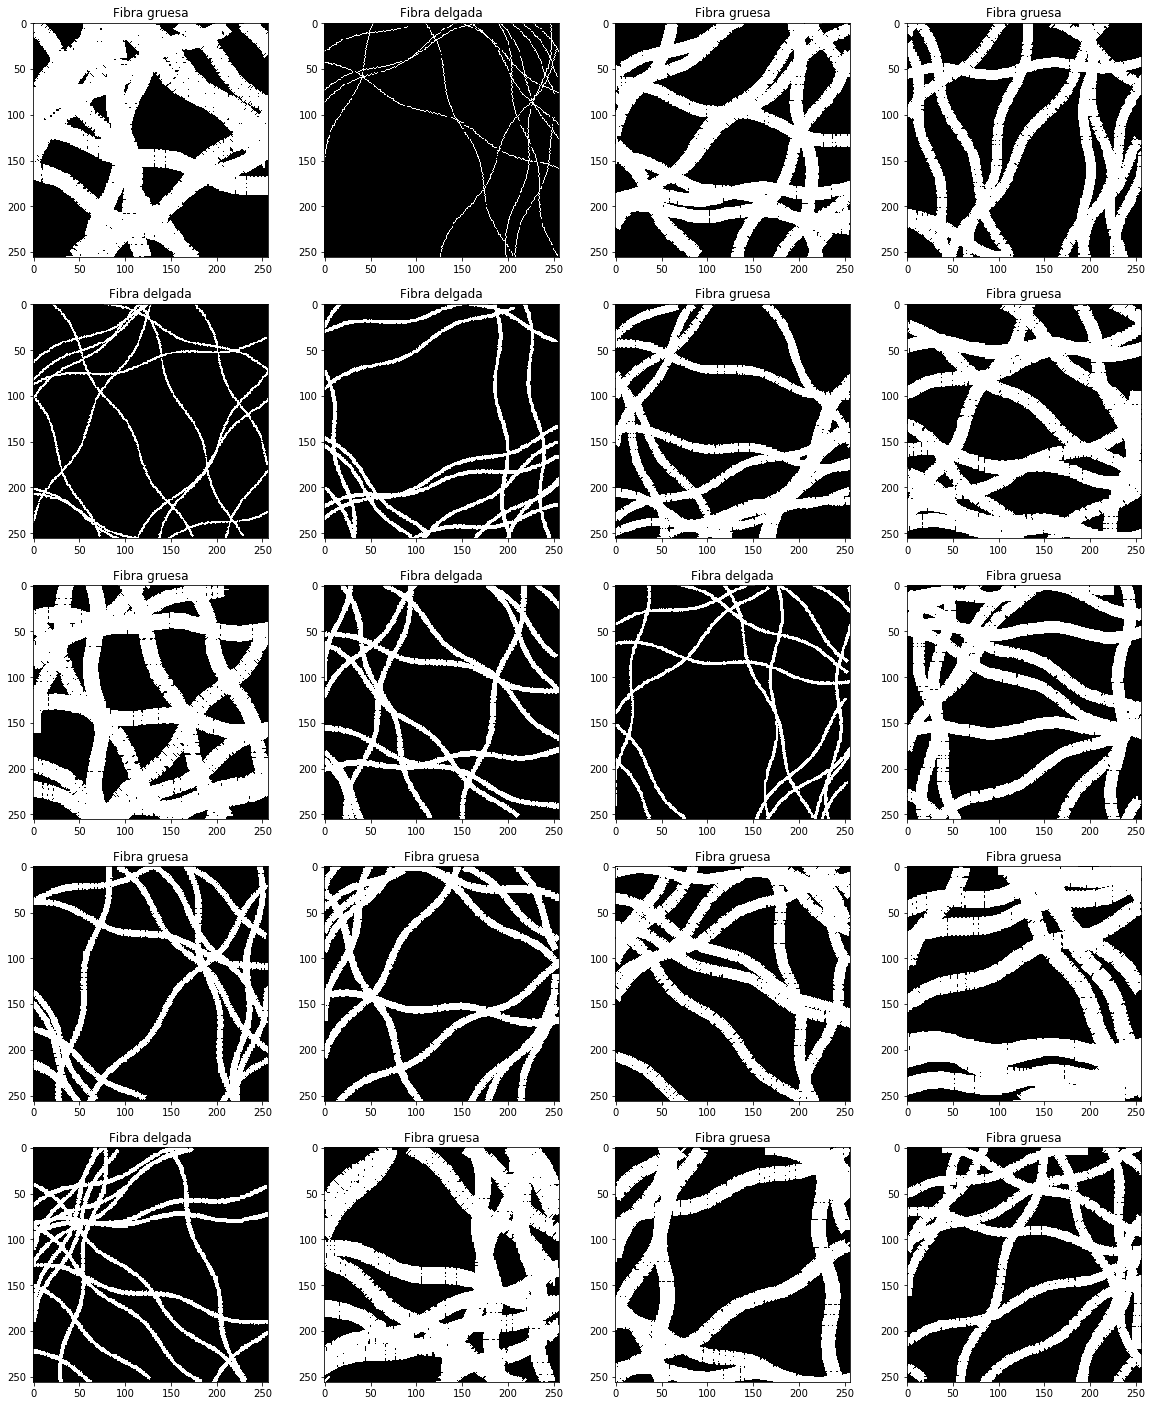

In [8]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

#img = img_as_bool(color.rgb2gray(io.imread('data/test/0001.png')))
#x = img_to_array(img)
#x = np.array(img)
#plt.imshow(x)

filas = math.ceil(len(imagenes)/4)
fig, axs = plt.subplots(filas, 4, figsize=(20,25))

fila = 0
col = 0

for k, img in enumerate(imagenes):
    
    col = col % 4
    
    axs[fila, col].imshow(np.array(img),cmap='gray')
    axs[fila, col].set_title(predicciones[k])
    
    col+=1
    
    if col == 4:
        fila+=1